# **Exploratory Data Analysis**


Objectives:

*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")


Plotting the distribution curve for the column `ConvertedComp`, to see how the data is distributed


/Users/tom/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


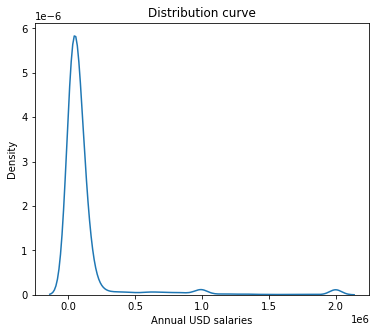

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt




plt.figure(figsize=(6, 5))
plt.title("Distribution curve")
plt.xlabel("Annual USD salaries")
sns.distplot(df, x=df['ConvertedComp'], hist=False)
plt.show()


Plotting histogram for the column `ConvertedComp`.


Text(0.5, 0, 'Annual USD salaries')

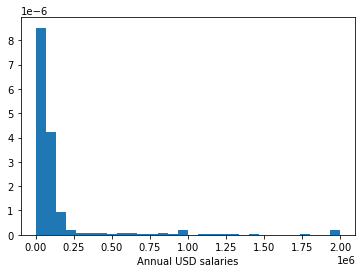

In [4]:
plt.hist(df['ConvertedComp'], density=True, bins=30)
plt.xlabel('Annual USD salaries')

Checking the median of `ConvertedComp`


In [5]:
print(df['ConvertedComp'].median())

57745.0


Checking how many responders identified themselves as 'Man'


In [6]:
print(df['Gender'].value_counts())

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64


Using the groupby() functions to find the median ConvertedComp of responders identifying as 'Woman'


In [7]:
df.groupby('Gender')['ConvertedComp'].median()

Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

Further exploratory analysis with the describe() function


In [8]:
print(df['Age'].describe())

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Histogram for the column `Age`


Text(0.5, 0, 'Age')

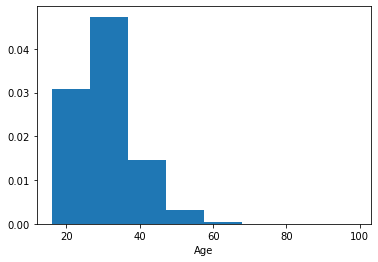

In [9]:
plt.hist(df['Age'], density=True, bins=8)
plt.xlabel('Age')

Find if outliers exist in `ConvertedComp` using a box plot


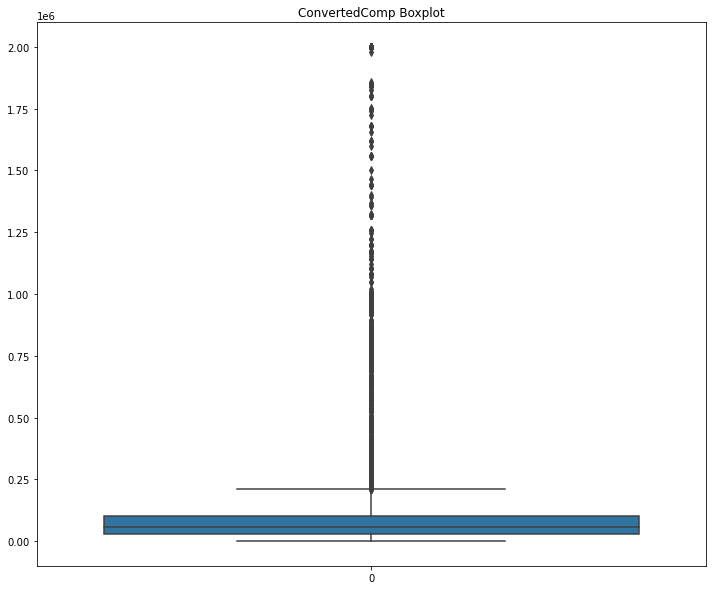

In [10]:
plt.figure(figsize=(12, 10))
plt.title("ConvertedComp Boxplot")
sns.boxplot(data=df['ConvertedComp'])
plt.show()


Outliers are clearly shown in the boxplot, so we need to remove these to create more accurate picture. 

Below is the Inter Quartile Range for the column `ConvertedComp`


In [11]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)



73132.0


Upper and lower bounds.


In [12]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(f'Lower is: {lower_limit}\nUpper is: {upper_limit}')

Lower is: -82830.0
Upper is: 209698.0


Identify how many outliers are there in `ConvertedComp`


In [13]:
number_of_outliers = 0
outliers_bool = (df['ConvertedComp'] < (Q1 - 1.5 * IQR)) |(df['ConvertedComp'] > (Q3 + 1.5 * IQR))
for row in outliers_bool:
    if row == True:
        number_of_outliers += 1
print(number_of_outliers)

879


Create a new dataframe by removing the outliers, and print a new boxplot for `ConvertedComp' column.


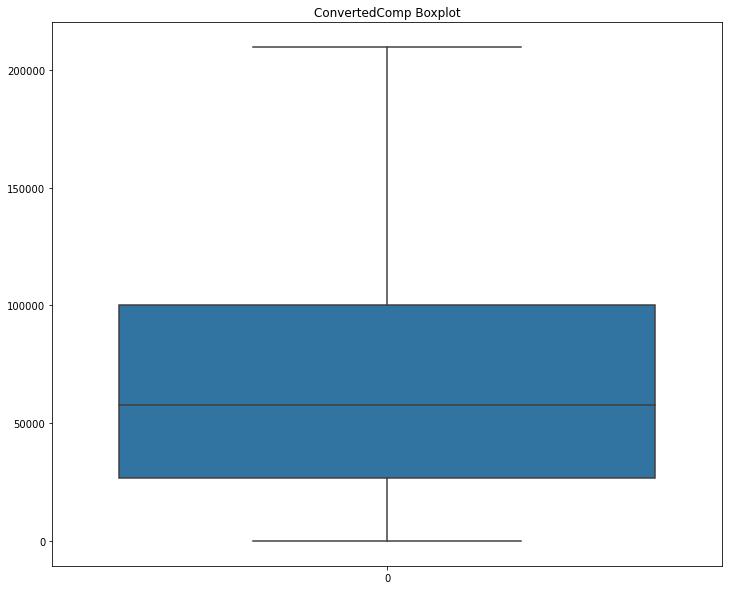

In [14]:
df['NewConvertedComp'] = df['ConvertedComp'].clip(lower=lower_limit, upper=upper_limit, axis=0)
plt.figure(figsize=(12, 10))
plt.title("ConvertedComp Boxplot")
sns.boxplot(data=df['NewConvertedComp'])
plt.show()

Finally using the corr() function to check for any correlation between columns


In [15]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,NewConvertedComp
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041,0.007559
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970,-0.024044
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386,0.670060
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518,0.040181
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469,-0.075362
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000,0.314283
NewConvertedComp,0.007559,-0.024044,0.670060,0.040181,-0.075362,0.314283,1.000000
